# Predicting the Sales Revenue 

We live in the world of e-commerce. We see tons of different stores here and there through the web. Internet made it possible to trade with anyone and everywhere. We can buy goods without leaving our house, we can compare prices in different stores within seconds, we can find what we really want and do not accept just the first more or less suitable offer. And I believe it would be really interesting to look at this world through the data it produces.

This is a transnational data set which contains all the transactions occurring between 2019 till April 2021 for a India-based and registered online eyewear retail platform.The company mainly sells eyeglasses, sunglasses and contact lenses.

## Import Libraries and data

We start our analysis by setting up our environment and by importing necessary libraries.

We import standard numpy and pandas to be able to perform analysis with Python, also we need data visualization libraries matplotlib and seaborn to output interesting visual findings.

In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
#Import dataset
df = pd.read_csv("Dataset.csv")
#Parse strings to datetime type
#dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True) #convert from string to datetime
#indexedDataset = dataset.set_index(['Month'])
#indexedDataset.head(5)

In [3]:
df.head(5)

,Name,Email,Paid,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Created,Lineitem quantity,...,Lineitem price,Lineitem sku,Billing City,Billing Province,Billing Country,Shipping City,Payment Method,Payment Reference,Vendor,Shipping Province Name
0,OIDLF3595,kumarsudheer336@gmail.com,2020-02-21 14:26:53 +0530,yes,0.0,374.0,67.32,441.32,2/21/20 14:26,1,...,690.0,HH-A-10467,HYDERABAD,TS,IN,HYDERABAD,"Razorpay (Cards, UPI, NetBanking, Wallets)",c12304300179518.1,Hardy Hawkins,Telangana
1,OIDLF3595,kumarsudheer336@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,2/21/20 14:26,1,...,399.0,LF-L-10001,NaN,NaN,NaN,NaN,NaN,NaN,Lensfit,NaN
2,OIDLF3594,manish.dagar89@gmail.com,2020-02-21 14:18:01 +0530,no,561.0,0.0,67.32,628.32,2/21/20 14:18,1,...,690.0,HH-A-10484,New Delhi,DL,IN,New Delhi,PayTM,c12304459661374.1,Hardy Hawkins,Delhi
3,OIDLF3594,manish.dagar89@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,2/21/20 14:18,1,...,990.0,LF-L-10024-Ex,NaN,NaN,NaN,NaN,NaN,NaN,Lensfit,NaN
4,OIDLF3593,kalpeshjha@gmail.com,2020-02-21 14:16:05 +0530,yes,586.0,0.0,70.32,656.32,2/21/20 14:16,1,...,715.0,HH-A-10602,Ahmedabad,GJ,IN,Ahmedabad,PayTM,c12304451141694.1,Hardy Hawkins,Gujarat


## Exploratory Data Analysis

In [4]:
#Every data science project starts with EDA as we have to understand what do we have to deal with. 
#I divide EDA into 2 types: visual and numerical. 
#Let's start with numerical as the simple pndas method .describe() gives us a lot of useful information.

In [5]:
df.describe()

,Subtotal,Shipping,Taxes,Total,Lineitem quantity,Lineitem price
count,19328.000000,19328.000000,19328.000000,19328.000000,38476.000000,38476.000000
mean,677.021905,36.843336,91.100142,804.969936,1.011124,871.959000
std,522.924150,89.327565,60.143762,559.356939,0.143224,382.923016
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,396.000000,0.000000,65.340000,560.340000,1.000000,715.000000
50%,570.000000,0.000000,74.400000,650.720000,1.000000,840.000000
75%,771.000000,0.000000,98.400000,863.520000,1.000000,990.000000
max,15159.000000,2500.000000,1819.080000,16978.080000,7.000000,10400.000000


In [6]:
df.dtypes

Name                       object
Email                      object
Paid                       object
Accepts Marketing          object
Subtotal                  float64
Shipping                  float64
Taxes                     float64
Total                     float64
Created                    object
Lineitem quantity           int64
Lineitem name              object
Lineitem price            float64
Lineitem sku               object
Billing City               object
Billing Province           object
Billing Country            object
Shipping City              object
Payment Method             object
Payment Reference          object
Vendor                     object
Shipping Province Name     object
dtype: object

In [7]:
#Dealing with null values
#if you encounter null values in the dataset you have to understand nature of those null values and possible impact they could have on the model. There are few strategies that we can use to fix our issue with null values:

#delete rows with null values
#delete the feature with null values
#impute data with mean or median values or use another imputing strategy (method .fillna())

In [8]:
df.isnull().sum()

Name                          0
Email                         1
Paid                      19880
Accepts Marketing         19148
Subtotal                  19148
Shipping                  19148
Taxes                     19148
Total                     19148
Created                       0
Lineitem quantity             0
Lineitem name                 0
Lineitem price                0
Lineitem sku                 14
Billing City              19150
Billing Province          19828
Billing Country           19150
Shipping City             19150
Payment Method            19824
Payment Reference         19865
Vendor                        5
Shipping Province Name    19827
dtype: int64

In [9]:
#We can drop the parameters which are haivng many null values.

In [10]:
df['Lineitem name'].head()

0    Hardy Hawkins HH A10467 Black Rectangle Full R...
1                           Non-Antiglare Lens (Basic)
2    Hardy Hawkins HH A10484 Stripped Round Full Ri...
3              Photogrey UV & Antiglare Lens (Classic)
4    Hardy Hawkins HH A10602 Matte-Black Wayfarer F...
Name: Lineitem name, dtype: object

In [11]:
df['Lineitem name'].value_counts().head()

Non-Antiglare Lens (Basic)                        5021
Anti-Glare & UV Lens (Classic)                    3075
Digital Blue-Cut Lens (Classic)                   2251
Digital Blue-Cut & Antiglare UV Lens (Classic)    1221
Transparent Driving & UV Lens (Classic)            794
Name: Lineitem name, dtype: int64

In [12]:
#Here we can see our best selling products, items that appear in orders the most often. 
#Also to make it visually more appealing let's create a bar chart for 15 top items.

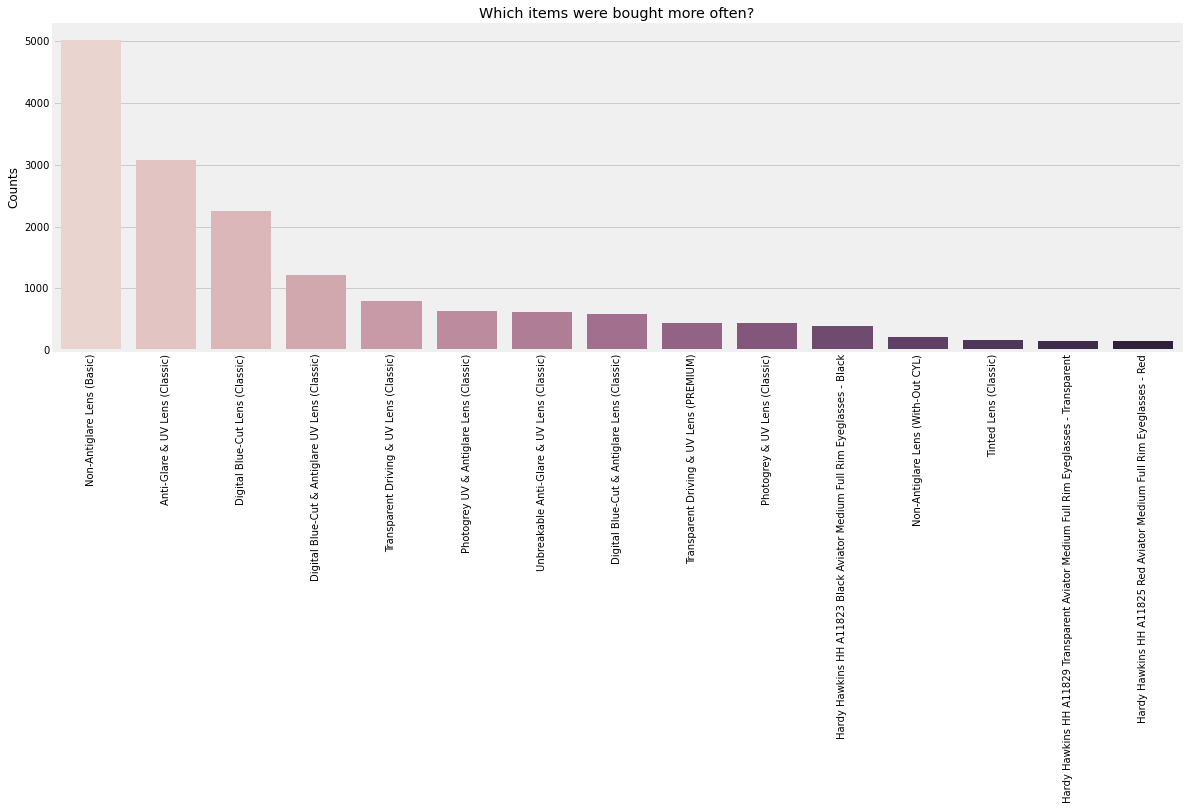

In [13]:
item_counts = df['Lineitem name'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [14]:
df['Lineitem name'].value_counts().tail()

Stark Wood SW A10249 Brown Rectangle Full Rim Eyeglasses - Brown                  1
SV-PG-ARC LFS ANTPR - Single vision photogrey antiglare                           1
Martin Snow CLIP-ON MS A10225 Brown Aviator Medium Full Rim Eyeglasses - Brown    1
Hardy Hawkins HH A10337 Brown Rectangle Full Rim Eyeglasses - Brown               1
Baker Hugges BH A10264 Silver Rectangle Rimless Eyeglasses - Silver               1
Name: Lineitem name, dtype: int64

In [15]:
df[~df['Lineitem name'].str.isupper()]['Lineitem name'].value_counts().head()

Non-Antiglare Lens (Basic)                        5021
Anti-Glare & UV Lens (Classic)                    3075
Digital Blue-Cut Lens (Classic)                   2251
Digital Blue-Cut & Antiglare UV Lens (Classic)    1221
Transparent Driving & UV Lens (Classic)            794
Name: Lineitem name, dtype: int64

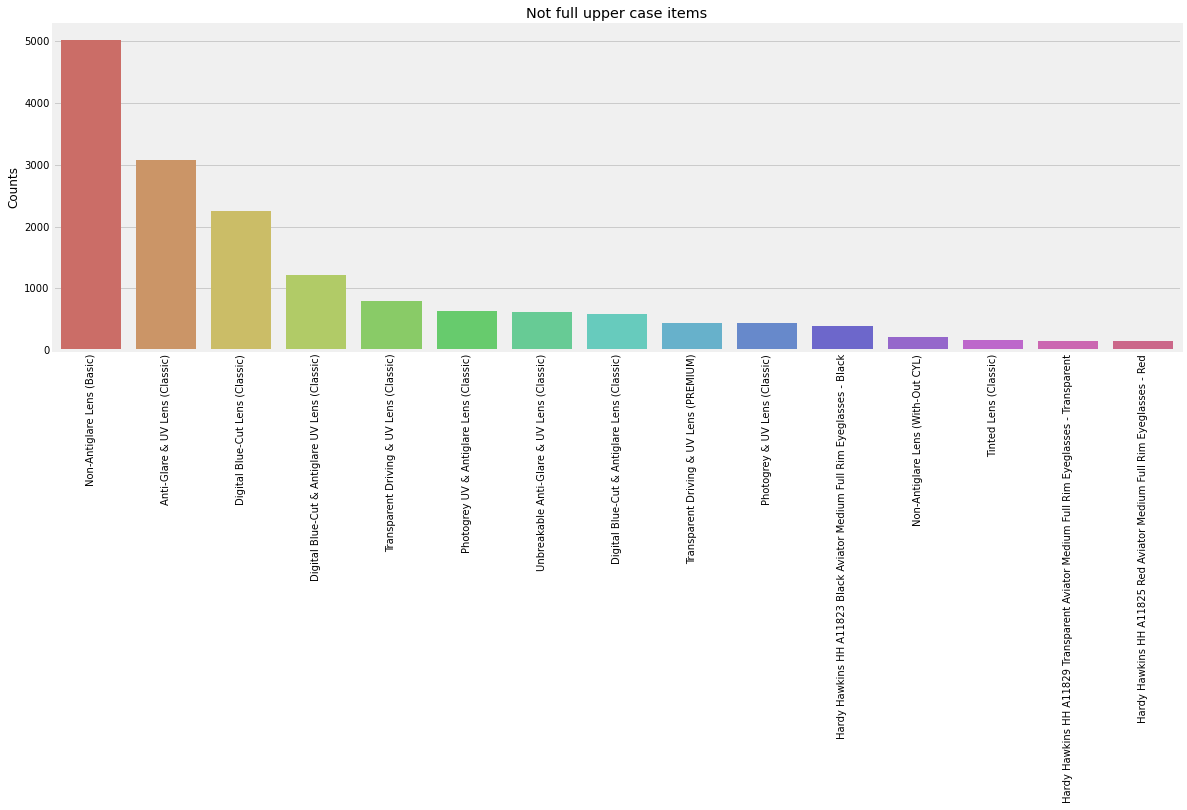

In [16]:
lcase_counts = df[~df['Lineitem name'].str.isupper()]['Lineitem name'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(lcase_counts.index, lcase_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Counts")
plt.title("Not full upper case items");
plt.xticks(rotation=90);

In [17]:
#ALso checking out stoke codes, looks like they are deeply 
#correlated with descriptions - which makes perfect sense.

In [18]:
df['Name'].value_counts().tail()

OIDLF12707    1
OIDLF21031    1
OIDLF20027    1
OIDLF23383    1
OIDLF22233    1
Name: Name, dtype: int64

# Visualize EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'Telangana'),
  Text(1, 0, 'Delhi'),
  Text(2, 0, 'Gujarat'),
  Text(3, 0, 'Tamil Nadu'),
  Text(4, 0, 'Kerala'),
  Text(5, 0, 'Rajasthan'),
  Text(6, 0, 'Uttar Pradesh'),
  Text(7, 0, 'Karnataka'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Maharashtra'),
  Text(10, 0, 'Chhattisgarh'),
  Text(11, 0, 'Punjab'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Andhra Pradesh'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'West Bengal'),
  Text(16, 0, 'Himachal Pradesh'),
  Text(17, 0, 'Goa'),
  Text(18, 0, 'Odisha'),
  Text(19, 0, 'Chandigarh'),
  Text(20, 0, 'Assam'),
  Text(21, 0, 'Bihar'),
  Text(22, 0, 'Uttarakhand'),
  Text(23, 0, 'Nagaland'),
  Text(24, 0, 'Manipur'),
  Text(25, 0, 'Tripura'),
  Text(26, 0, 'Puducherry'),
  Text(27, 0, 'Jammu and Kashmir'),
  Text(28, 0, 'Andaman and Nicobar Islands'),
  Tex

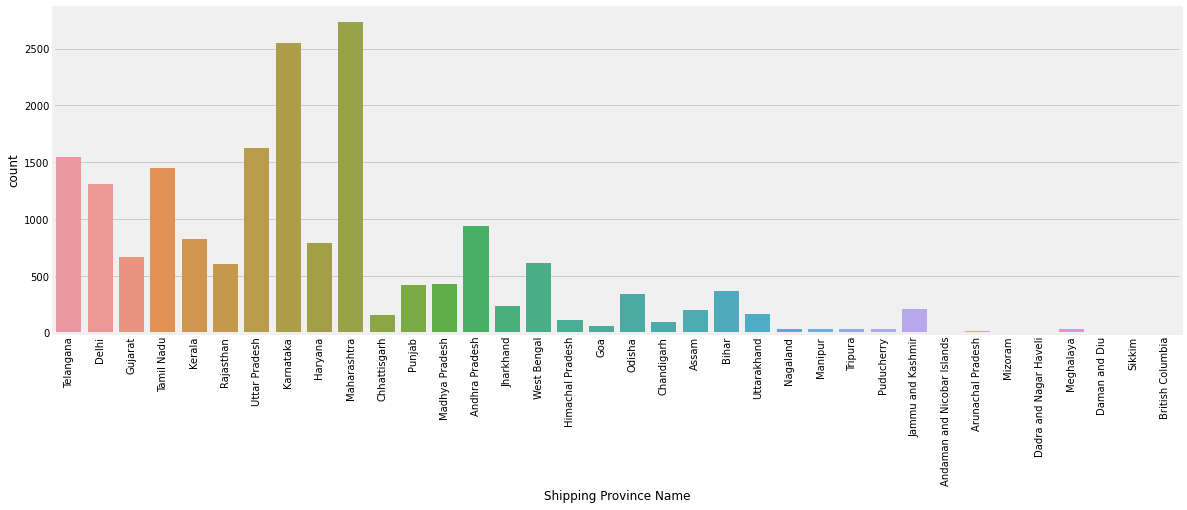

In [19]:
plt.figure(figsize=(18,6))
sns.countplot(df[df['Shipping Province Name'] != 'IN']['Shipping Province Name'])
plt.xticks(rotation=90)

In [20]:
#From above plots and calculations we can see that vast majority of sales are from states - North, West
#South regions. 
#Very less sales from North East regions.

### Detecting Outliers using scatter plot.


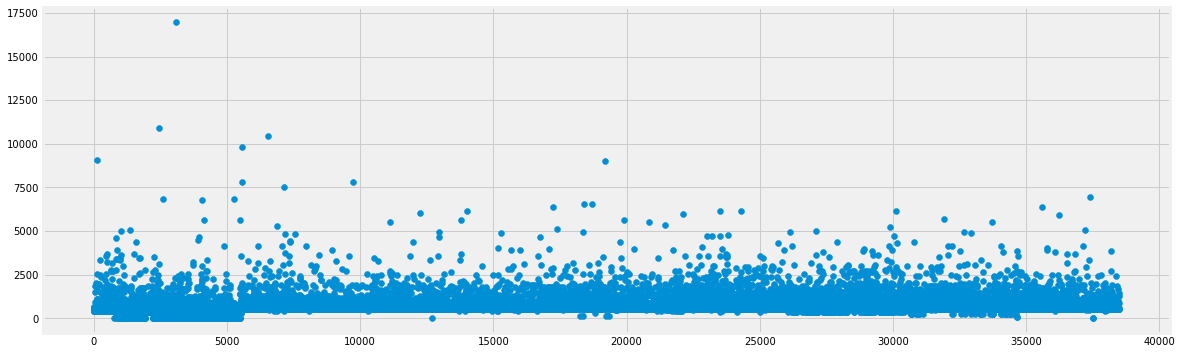

In [22]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Total'])

In [23]:
#Let's remove outliers

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000., 45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

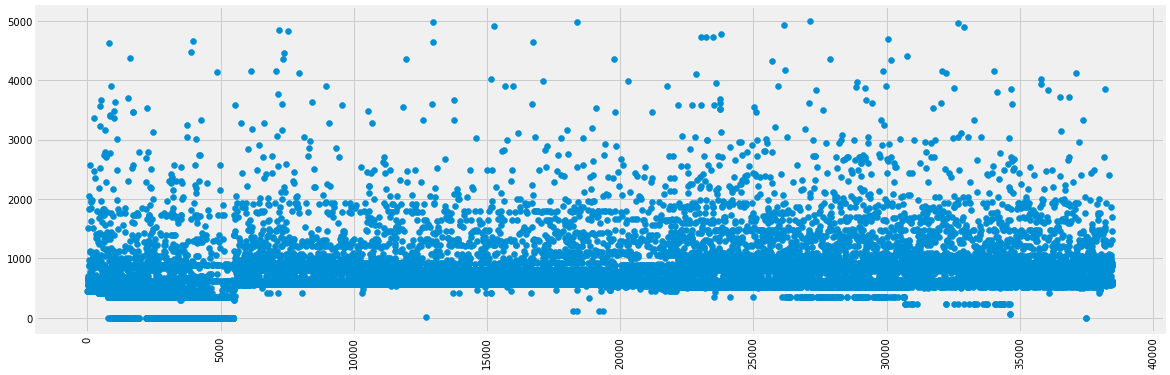

In [24]:
df = df[df['Total'] < 5000]
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Total'])
plt.xticks(rotation=90)

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000., 45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

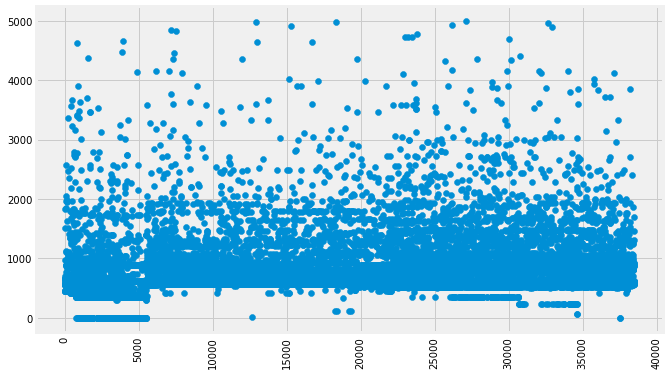

In [25]:
df_quantile = df[df['Total'] < 5000]
plt.scatter(x=df_quantile.index, y=df_quantile['Total'])
plt.xticks(rotation=90)

In [26]:
df_quantile.describe()

,Subtotal,Shipping,Taxes,Total,Lineitem quantity,Lineitem price
count,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000
mean,666.369269,36.553891,89.880214,792.807936,1.010783,868.836072
std,457.134445,84.640852,51.871932,479.943855,0.149268,247.425979
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,396.000000,0.000000,65.340000,560.340000,1.000000,840.000000
50%,561.000000,0.000000,74.400000,650.720000,1.000000,840.000000
75%,771.000000,0.000000,98.400000,863.520000,1.000000,840.000000
max,4461.000000,2500.000000,535.320000,4996.320000,7.000000,4710.000000


Looks like our data is almost ready for modelling. We performed a clean up, we removed outliers that were disturbing the balance of our dataset, we removed invalid records - now our data looks much better! and it doesn't lose it's value.

### Analysing sales over time

In [27]:
df_ts = df[['Created','Total']]

In [28]:
df_ts['Created'] = df_ts['Created'].apply(lambda x: 
                                    datetime.strptime(x,'%m/%d/%y %H:%M'))

In [29]:
#Converting data time stamp

In [30]:
df_ts.index = df_ts['Created']

In [31]:
df_ts.drop(["Created"],axis=1,inplace=True)

In [32]:
df_ts.dtypes

Total    float64
dtype: object

In [33]:
#We are resampling the time data by days

<AxesSubplot:xlabel='Created'>

<Figure size 1296x432 with 0 Axes>

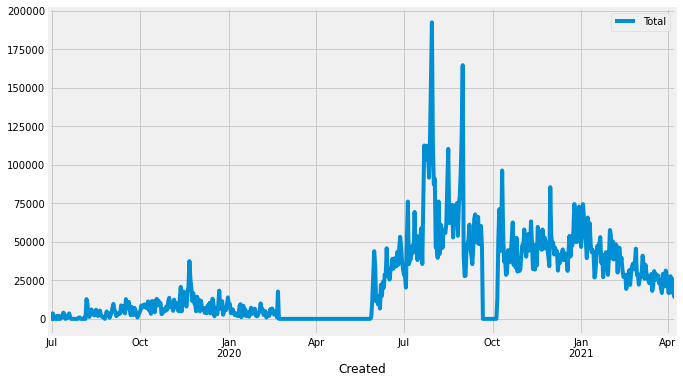

In [34]:
plt.figure(figsize=(18,6))
df_resample = df_ts.resample('D').sum()
df_resample.plot()

In [35]:
#As we can from the above graph, due to corona lockdown in March 2020 to June 2020 the sales were almost NILL.

### Preparing data for modeling and feature creation

In [36]:
df_clean = df[df['Total'] < 5000]
df_clean.describe()

,Subtotal,Shipping,Taxes,Total,Lineitem quantity,Lineitem price
count,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000
mean,666.369269,36.553891,89.880214,792.807936,1.010783,868.836072
std,457.134445,84.640852,51.871932,479.943855,0.149268,247.425979
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,396.000000,0.000000,65.340000,560.340000,1.000000,840.000000
50%,561.000000,0.000000,74.400000,650.720000,1.000000,840.000000
75%,771.000000,0.000000,98.400000,863.520000,1.000000,840.000000
max,4461.000000,2500.000000,535.320000,4996.320000,7.000000,4710.000000


In [37]:
df_clean.index

Int64Index([    0,     2,     4,     6,     8,    10,    12,    14,    16,
               18,
            ...
            38457, 38459, 38460, 38462, 38464, 38466, 38468, 38470, 38472,
            38474],
           dtype='int64', length=19289)

In [38]:
df_clean = df[df['Total'] < 5000]
df_clean.describe()

,Subtotal,Shipping,Taxes,Total,Lineitem quantity,Lineitem price
count,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000
mean,666.369269,36.553891,89.880214,792.807936,1.010783,868.836072
std,457.134445,84.640852,51.871932,479.943855,0.149268,247.425979
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,396.000000,0.000000,65.340000,560.340000,1.000000,840.000000
50%,561.000000,0.000000,74.400000,650.720000,1.000000,840.000000
75%,771.000000,0.000000,98.400000,863.520000,1.000000,840.000000
max,4461.000000,2500.000000,535.320000,4996.320000,7.000000,4710.000000


In [39]:
df_clean.index

Int64Index([    0,     2,     4,     6,     8,    10,    12,    14,    16,
               18,
            ...
            38457, 38459, 38460, 38462, 38464, 38466, 38468, 38470, 38472,
            38474],
           dtype='int64', length=19289)

In [40]:
df_join = df_clean.groupby('Vendor')[['Lineitem quantity']].sum()

In [41]:
df_join

,Lineitem quantity
Vendor,
Baker Hugges,577
ACUVUE,3
ALCON,7
BAUSCH & LOMB,23
Baker Hugges,8820
FRESH LOOK,1
Fastrack,16
Hardy Hawkins,4376
KNIGHT HORSE,349


In [42]:
df_clean.head()

,Name,Email,Paid,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Created,Lineitem quantity,...,Lineitem price,Lineitem sku,Billing City,Billing Province,Billing Country,Shipping City,Payment Method,Payment Reference,Vendor,Shipping Province Name
0,OIDLF3595,kumarsudheer336@gmail.com,2020-02-21 14:26:53 +0530,yes,0.0,374.0,67.32,441.32,2/21/20 14:26,1,...,690.0,HH-A-10467,HYDERABAD,TS,IN,HYDERABAD,"Razorpay (Cards, UPI, NetBanking, Wallets)",c12304300179518.1,Hardy Hawkins,Telangana
2,OIDLF3594,manish.dagar89@gmail.com,2020-02-21 14:18:01 +0530,no,561.0,0.0,67.32,628.32,2/21/20 14:18,1,...,690.0,HH-A-10484,New Delhi,DL,IN,New Delhi,PayTM,c12304459661374.1,Hardy Hawkins,Delhi
4,OIDLF3593,kalpeshjha@gmail.com,2020-02-21 14:16:05 +0530,yes,586.0,0.0,70.32,656.32,2/21/20 14:16,1,...,715.0,HH-A-10602,Ahmedabad,GJ,IN,Ahmedabad,PayTM,c12304451141694.1,Hardy Hawkins,Gujarat
6,OIDLF3592,dineshsundar1706@gmail.com,2020-02-21 14:15:21 +0530,yes,486.0,0.0,58.32,544.32,2/21/20 14:15,1,...,715.0,BH-A-10983,Chennai,TN,IN,Chennai,PayTM,c12304473391166.1,Baker Hugges,Tamil Nadu
8,OIDLF3591,srinath41195@gmail.com,2020-02-21 13:44:52 +0530,yes,491.0,99.0,76.74,666.74,2/21/20 13:44,1,...,720.0,BH-A-10717,Hyderabad,TS,IN,Hyderabad,PayTM,c12304416636990.1,Baker Hugges,Telangana


In [43]:
df_resample

,Total
Created,
2019-06-28,2460.64
2019-06-29,0.00
2019-06-30,0.00
2019-07-01,0.00
2019-07-02,3581.76
...,...
2021-04-05,17025.18
2021-04-06,25856.86
2021-04-07,20164.91


In [ ]:
#Check the sorting

In [44]:
df_resample["sales_last_3days"] = df_resample["Total"].rolling(3).apply(sum)
df_resample["sales_last_6days"] = df_resample["Total"].rolling(6).apply(sum)
df_resample["sales_last_10days"] = df_resample["Total"].rolling(10).apply(sum)
df_resample["sales_last_30days"] = df_resample["Total"].rolling(30).apply(sum)
df_resample["sales_var_last_3days"] = df_resample["Total"].rolling(3).apply(np.var)
df_resample["sales_var_last_6days"] = df_resample["Total"].rolling(6).apply(np.var)
df_resample["sales_var_last_10days"] = df_resample["Total"].rolling(10).apply(np.var)
df_resample["sales_var_last_30days"] = df_resample["Total"].rolling(30).apply(np.var)

In [ ]:
#ratios 

In [45]:
df_resample["Sales_3d6dratio"]=df_resample["sales_last_3days"]/(df_resample["sales_last_6days"]+0.0001)
df_resample["Sales_6d10dratio"]=df_resample["sales_last_6days"]/(df_resample["sales_last_10days"]+0.0001)
df_resample["Sales_10d30dratio"]=df_resample["sales_last_10days"]/(df_resample["sales_last_30days"]+0.0001)

In [ ]:
#We are working on 3 variables - Created (Date and time of purchase value), Accepts Marketing(Yes/No) 
#and Billing Province (State).

In [46]:
df2 = df[["Created","Accepts Marketing","Billing Province"]].copy()
df2["Created"] = pd.to_datetime(df2["Created"])
df2.head()

,Created,Accepts Marketing,Billing Province
0,2020-02-21 14:26:00,yes,TS
2,2020-02-21 14:18:00,no,DL
4,2020-02-21 14:16:00,yes,GJ
6,2020-02-21 14:15:00,yes,TN
8,2020-02-21 13:44:00,yes,TS


In [47]:
df2 = pd.get_dummies(df2,columns=["Accepts Marketing","Billing Province"],drop_first=True)

In [48]:
df2.index = df2["Created"]
df2.drop(["Created"],axis=1,inplace=True)
df3 = df2.resample('D').sum().copy()
df3.head()

,Accepts Marketing_yes,Billing Province_AP,Billing Province_AR,Billing Province_AS,Billing Province_BR,Billing Province_CG,Billing Province_CH,Billing Province_DD,Billing Province_DL,Billing Province_DN,...,Billing Province_PY,Billing Province_RJ,Billing Province_SK,Billing Province_TN,Billing Province_TR,Billing Province_TS,Billing Province_UK,Billing Province_UP,Billing Province_WA,Billing Province_WB
Created,,,,,,,,,,,,,,,,,,,,,
2019-06-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-06-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-06-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-07-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-07-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#concatning days

In [49]:
df4 = pd.concat([df_resample,df3],axis=1)
df4.head()

,Total,sales_last_3days,sales_last_6days,sales_last_10days,sales_last_30days,sales_var_last_3days,sales_var_last_6days,sales_var_last_10days,sales_var_last_30days,Sales_3d6dratio,...,Billing Province_PY,Billing Province_RJ,Billing Province_SK,Billing Province_TN,Billing Province_TR,Billing Province_TS,Billing Province_UK,Billing Province_UP,Billing Province_WA,Billing Province_WB
Created,,,,,,,,,,,,,,,,,,,,,
2019-06-28,2460.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-06-29,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-06-30,0.00,2460.64,NaN,NaN,NaN,1.345500e+06,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-07-01,0.00,0.00,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-07-02,3581.76,3581.76,NaN,NaN,NaN,2.850890e+06,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Below we are predicitng the next 7 days sale

In [50]:
df4["sales_next_week"] = df4["Total"].rolling(7).apply(sum).shift(-7)

In [51]:
df4 = df4.dropna()

In [52]:
df4

,Total,sales_last_3days,sales_last_6days,sales_last_10days,sales_last_30days,sales_var_last_3days,sales_var_last_6days,sales_var_last_10days,sales_var_last_30days,Sales_3d6dratio,...,Billing Province_RJ,Billing Province_SK,Billing Province_TN,Billing Province_TR,Billing Province_TS,Billing Province_UK,Billing Province_UP,Billing Province_WA,Billing Province_WB,sales_next_week
Created,,,,,,,,,,,,,,,,,,,,,
2019-07-27,0.00,0.00,0.00,6345.94,28432.74,0.000000e+00,0.000000e+00,1.246660e+06,1.682601e+06,0.000000,...,0,0,0,0,0,0,0,0,0,1734.88
2019-07-28,0.00,0.00,0.00,4945.94,25972.10,0.000000e+00,0.000000e+00,1.208746e+06,1.629522e+06,0.000000,...,0,0,0,0,0,0,0,0,0,2808.88
2019-07-29,838.88,838.88,838.88,2238.88,26810.98,1.563821e+05,9.773884e+04,2.162461e+05,1.603780e+06,1.000000,...,0,0,0,0,1,0,0,0,0,1970.00
2019-07-30,896.00,1734.88,1734.88,1734.88,27706.98,1.677554e+05,1.674835e+05,1.205555e+05,1.576265e+06,1.000000,...,0,0,0,0,1,0,0,0,0,13873.86
2019-07-31,0.00,1734.88,1734.88,1734.88,27706.98,1.677554e+05,1.674835e+05,1.205555e+05,1.576265e+06,1.000000,...,0,0,0,0,0,0,0,0,0,23731.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-29,21175.70,71423.97,133791.43,241184.62,797315.29,1.437085e+07,1.580509e+07,1.639558e+07,2.559018e+07,0.533846,...,2,0,3,0,0,0,3,0,0,164276.90
2021-03-30,31356.71,73611.85,139692.25,243590.83,800191.54,2.325383e+07,2.685141e+07,1.924205e+07,2.622171e+07,0.526957,...,0,0,4,1,1,0,1,0,2,158777.05
2021-03-31,28277.46,80809.87,147873.76,244770.31,799205.60,1.817442e+07,2.745922e+07,2.001335e+07,2.608277e+07,0.546479,...,1,0,1,0,2,0,2,0,2,150664.50


In [53]:
df4["covid_ind"] = np.where((df4.index > "2020-03-01") & (df4.index < "2020-06-30"),1,0)
df4.covid_ind.value_counts()

0    496
1    120
Name: covid_ind, dtype: int64

In [ ]:
#Defining test and train values. Train data is beofre 31st January 2021. 
#Test data is after 31st January 2021 till April 2021.

In [54]:
train_df = df4[df4.index <= "2021-01-31"]
test_df = df4[df4.index > "2021-01-31"]
X_train = train_df.drop(["sales_next_week"],axis=1).copy()
X_test = test_df.drop(["sales_next_week"],axis=1).copy()
y_train = train_df["sales_next_week"].copy()
y_test = test_df["sales_next_week"].copy()

# Modelling using Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [57]:
linreg.score(X_test,y_test)

-1.3464626851114039

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(learning_rate=0.01,max_depth=5,n_estimators=50)
gbm.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=50)

In [59]:
gbm.score(X_test,y_test)

-0.5965132267489466

In [60]:
linreg.predict(X_test) #Actual Sales Revenue

array([322481.81985228, 348806.02537212, 310334.9494566 , 319928.25260402,
       281620.55535637, 298763.30035035, 300430.19764533, 259847.0272476 ,
       338904.43740124, 321190.99632002, 282794.071136  , 297097.93770353,
       211498.39482439, 257635.73340229, 324971.16775405, 229674.46008966,
       209064.86270538, 234953.14588633, 187330.73718386, 197842.42062729,
       193673.9191508 , 264602.63931614, 182540.84645856, 249010.16176718,
       270127.77971709, 229790.84366617, 326831.62844461, 315279.1038705 ,
       236013.61183274, 253238.70249291, 198095.18504963, 227379.01809076,
       270645.12994921, 296710.50620898, 255026.02258462, 223802.65839209,
       247339.54273701, 143824.52969169, 202657.93757865, 249477.24841342,
       213291.43055096, 218828.75189919, 217128.59830685, 128117.73795001,
       198860.09522258, 390498.50650893, 201710.80387095, 151547.77757723,
       219220.36857348, 210507.32416707, 236040.31222639, 166034.66012747,
       188832.75505356, 1

In [61]:
np.array(y_test) #Predicted Sales Revenue

array([294176.02, 299811.28, 295661.28, 293261.19, 293111.29, 276650.96,
       256307.69, 253428.35, 237096.35, 210443.56, 198422.6 , 186733.95,
       186314.05, 181101.65, 183728.22, 189252.24, 205711.36, 213770.29,
       222630.07, 236654.94, 243079.11, 242522.69, 230595.55, 220424.65,
       216114.65, 209237.18, 204634.75, 211198.78, 207944.52, 220789.99,
       224481.59, 224086.6 , 218880.27, 200923.37, 190962.71, 194082.42,
       177180.53, 169674.49, 173177.97, 173622.71, 179523.05, 181537.2 ,
       180550.32, 185562.65, 189099.84, 178188.87, 169760.65, 169978.98,
       163960.44, 156994.17, 165148.14, 167969.71, 170699.49, 170662.71,
       161813.36, 168427.42, 164276.9 , 158777.05, 150664.5 , 142024.88,
       141529.93])

<AxesSubplot:xlabel='Created', ylabel='sales_next_week'>

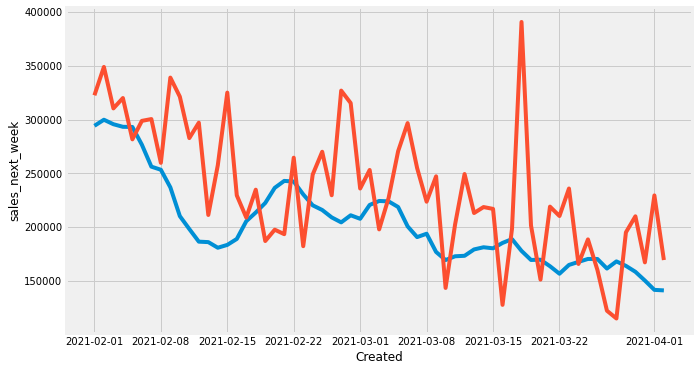

In [62]:
sns.lineplot(x=X_test.index,y=y_test)
sns.lineplot(x=X_test.index,y=linreg.predict(X_test))

In the above graph, Blue line indicates the Predicted Sales revenue of next 7 days and Orange line indicates the Actual Sales revenue of next 7 days.

In [63]:
X_test.tail()

,Total,sales_last_3days,sales_last_6days,sales_last_10days,sales_last_30days,sales_var_last_3days,sales_var_last_6days,sales_var_last_10days,sales_var_last_30days,Sales_3d6dratio,...,Billing Province_RJ,Billing Province_SK,Billing Province_TN,Billing Province_TR,Billing Province_TS,Billing Province_UK,Billing Province_UP,Billing Province_WA,Billing Province_WB,covid_ind
Created,,,,,,,,,,,,,,,,,,,,,
2021-03-29,21175.70,71423.97,133791.43,241184.62,797315.29,1.437085e+07,1.580509e+07,1.639558e+07,2.559018e+07,0.533846,...,2,0,3,0,0,0,3,0,0,0
2021-03-30,31356.71,73611.85,139692.25,243590.83,800191.54,2.325383e+07,2.685141e+07,1.924205e+07,2.622171e+07,0.526957,...,0,0,4,1,1,0,1,0,2,0
2021-03-31,28277.46,80809.87,147873.76,244770.31,799205.60,1.817442e+07,2.745922e+07,2.001335e+07,2.608277e+07,0.546479,...,1,0,1,0,2,0,2,0,2,0
2021-04-01,22825.73,82459.90,153883.87,239454.07,799784.50,1.244231e+07,1.678968e+07,1.866023e+07,2.592401e+07,0.535858,...,0,0,2,0,1,2,3,0,1,0
2021-04-02,16778.84,67882.03,141493.88,233030.17,790830.20,2.205606e+07,2.356691e+07,2.332837e+07,2.906056e+07,0.479752,...,2,0,2,0,0,0,0,0,0,0


In [64]:
act = np.array(y_test)
pred = linreg.predict(X_test)

In [65]:
np.mean(np.abs((act-pred)/act))

0.2497741197341223

The above MAPE (Mean Absolute Percentage error is 18%.